<a href="https://colab.research.google.com/github/delfinamoya06/finanzas-trabajo-practico-utn-2025/blob/main/Notebook4_Analisis_fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Creando Dashboard Comparativo del Sector ---
Obteniendo datos para Coca-Cola (KO)...
Obteniendo datos para PepsiCo (PEP)...
Obteniendo datos para Keurig Dr Pepper (KDP)...
Obteniendo datos para Monster Beverage (MNST)...

Dashboard Sectorial de Compañías de Bebidas
                  EV/EBITDA  EV/Revenue  Forward P/E  Trailing P/E PEG Ratio  Price/Book Price/Sales  Operating Margin  Profit Margin  ROA  ROE  Total Debt/Equity  Interest Coverage    Market Cap  52 Week High  52 Week Low  52-Week Change  Beta
Empresa                                                                                                                                                                                                                                             
Coca-Cola             21.33        7.16        23.61         24.86      None       10.56        None              0.35           0.26 0.09 0.42                NaN                NaN  301751795712         74.38        60.62            0.01  

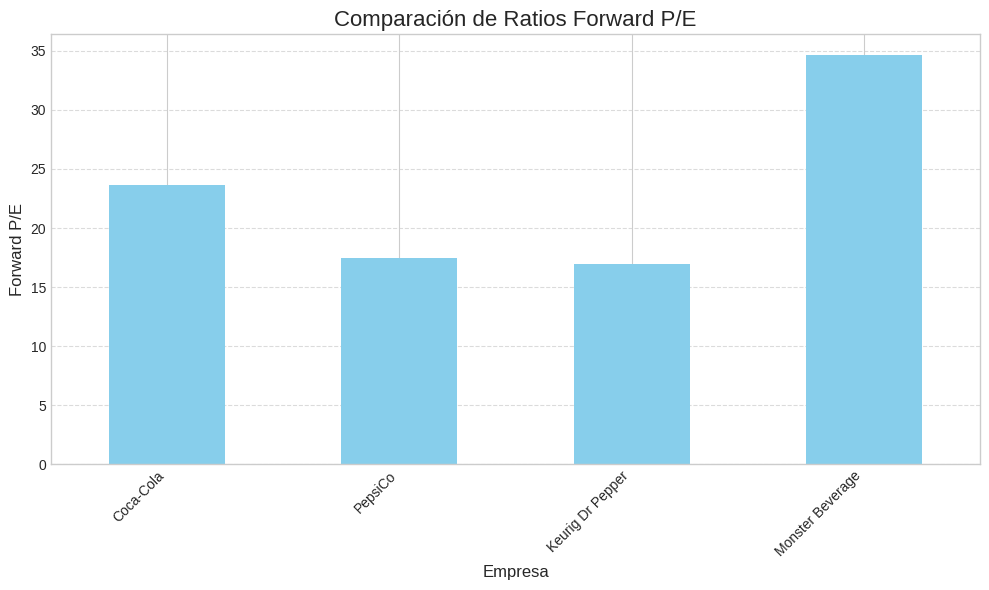

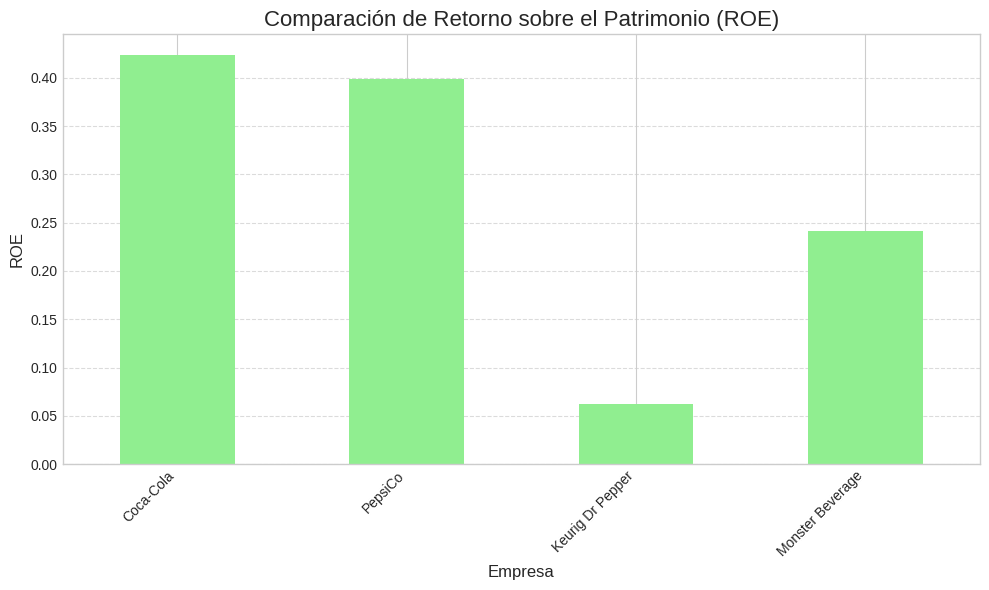

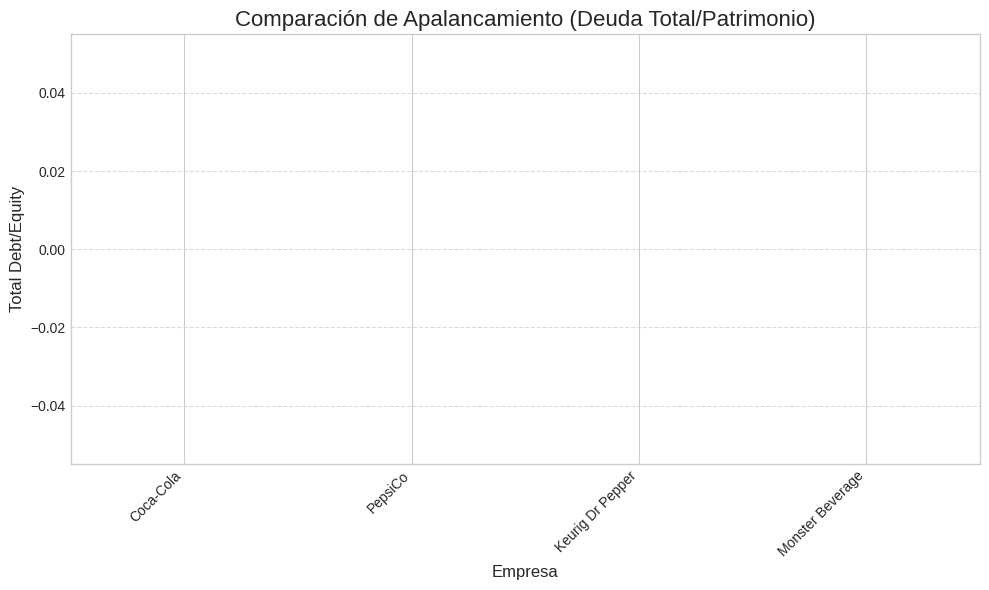


Análisis Visual:
Los gráficos de barras ofrecen una comparación visual rápida de los ratios clave.
- Un menor P/E o ROE más alto podría indicar una mejor oportunidad de inversión en este backtesting.
- Un menor ratio de Deuda/Patrimonio indica menor riesgo de apalancamiento.
Recuerda que estos son solo algunos de los muchos factores a considerar al evaluar una empresa.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ────────────────────────────────────────────────────────────────
# 1. Configuración del Sector
# ────────────────────────────────────────────────────────────────

SECTOR_COMPANIES = {
    'Coca-Cola': 'KO',
    'PepsiCo': 'PEP',
    'Keurig Dr Pepper': 'KDP',
    'Monster Beverage': 'MNST'
}

# ────────────────────────────────────────────────────────────────
# 2. Extracción de Ratios Financieros
# ────────────────────────────────────────────────────────────────

def get_company_data(ticker_symbol):
    """
    Descarga y extrae los principales ratios financieros y de mercado de una empresa.
    """
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    if not info:
        return None

    try:
        ev_ebitda = info.get('enterpriseValue') / info.get('ebitda')
    except (TypeError, ZeroDivisionError):
        ev_ebitda = np.nan

    try:
        ev_revenue = info.get('enterpriseValue') / info.get('totalRevenue')
    except (TypeError, ZeroDivisionError):
        ev_revenue = np.nan

    try:
        total_debt_equity = info.get('totalDebt') / info.get('totalEquity')
    except (TypeError, ZeroDivisionError):
        total_debt_equity = np.nan

    try:
        interest_coverage = info.get('ebit') / info.get('interestExpense')
    except (TypeError, ZeroDivisionError):
        interest_coverage = np.nan

    ratios = {
        'EV/EBITDA': ev_ebitda,
        'EV/Revenue': ev_revenue,
        'Forward P/E': info.get('forwardPE'),
        'Trailing P/E': info.get('trailingPE'),
        'PEG Ratio': info.get('pegRatio'),
        'Price/Book': info.get('priceToBook'),
        'Price/Sales': info.get('priceToSales'),
        'Operating Margin': info.get('operatingMargins'),
        'Profit Margin': info.get('profitMargins'),
        'ROA': info.get('returnOnAssets'),
        'ROE': info.get('returnOnEquity'),
        'Total Debt/Equity': total_debt_equity,
        'Interest Coverage': interest_coverage,
        'Market Cap': info.get('marketCap'),
        '52 Week High': info.get('fiftyTwoWeekHigh'),
        '52 Week Low': info.get('fiftyTwoWeekLow'),
        '52-Week Change': info.get('52WeekChange'),
        'Beta': info.get('beta')
    }

    return ratios

# ────────────────────────────────────────────────────────────────
# 3. Construcción del Dashboard y Gráficos
# ────────────────────────────────────────────────────────────────

print("--- Creando Dashboard Comparativo del Sector ---")

sector_data = []

for company, ticker in SECTOR_COMPANIES.items():
    print(f"Obteniendo datos para {company} ({ticker})...")
    company_ratios = get_company_data(ticker)
    if company_ratios:
        company_ratios['Empresa'] = company
        sector_data.append(company_ratios)

dashboard_df = pd.DataFrame(sector_data)
dashboard_df = dashboard_df.set_index('Empresa')

# Imprimir la tabla comparativa
print("\n" + "="*80)
print("Dashboard Sectorial de Compañías de Bebidas")
print("="*80)
print(dashboard_df.to_string(float_format="{:,.2f}".format))

# ────────────────────────────────────────────────────────────────
# 4. Generación de Gráficos de Comparación
# ────────────────────────────────────────────────────────────────

plt.style.use('seaborn-v0_8-whitegrid')

# Gráfico de Ratios de Valuación (Forward P/E)
plt.figure(figsize=(10, 6))
dashboard_df['Forward P/E'].plot(kind='bar', color='skyblue')
plt.title('Comparación de Ratios Forward P/E', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Forward P/E', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de Ratios de Rentabilidad (ROE)
plt.figure(figsize=(10, 6))
dashboard_df['ROE'].plot(kind='bar', color='lightgreen')
plt.title('Comparación de Retorno sobre el Patrimonio (ROE)', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('ROE', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de Ratios de Solvencia (Total Debt/Equity)
plt.figure(figsize=(10, 6))
dashboard_df['Total Debt/Equity'].plot(kind='bar', color='coral')
plt.title('Comparación de Apalancamiento (Deuda Total/Patrimonio)', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Total Debt/Equity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Análisis Visual:")
print("Los gráficos de barras ofrecen una comparación visual rápida de los ratios clave.")
print("- Un menor P/E o ROE más alto podría indicar una mejor oportunidad de inversión en este backtesting.")
print("- Un menor ratio de Deuda/Patrimonio indica menor riesgo de apalancamiento.")
print("Recuerda que estos son solo algunos de los muchos factores a considerar al evaluar una empresa.")

--- Creando Dashboard Comparativo del Sector ---
Obteniendo datos para Coca-Cola (KO)...
Obteniendo datos para PepsiCo (PEP)...
Obteniendo datos para Keurig Dr Pepper (KDP)...
Obteniendo datos para Monster Beverage (MNST)...

Dashboard Sectorial de Compañías de Bebidas
                  EV/EBITDA  EV/Revenue  Forward P/E  Trailing P/E PEG Ratio  Price/Book Price/Sales  Operating Margin  Profit Margin  ROA  ROE  Total Debt/Equity  Interest Coverage    Market Cap  52 Week High  52 Week Low  52-Week Change  Beta
Empresa                                                                                                                                                                                                                                             
Coca-Cola             21.43        7.19        23.54         24.79      None       10.53        None              0.35           0.26 0.09 0.42                NaN                NaN  300912574464         74.38        60.62            0.01  

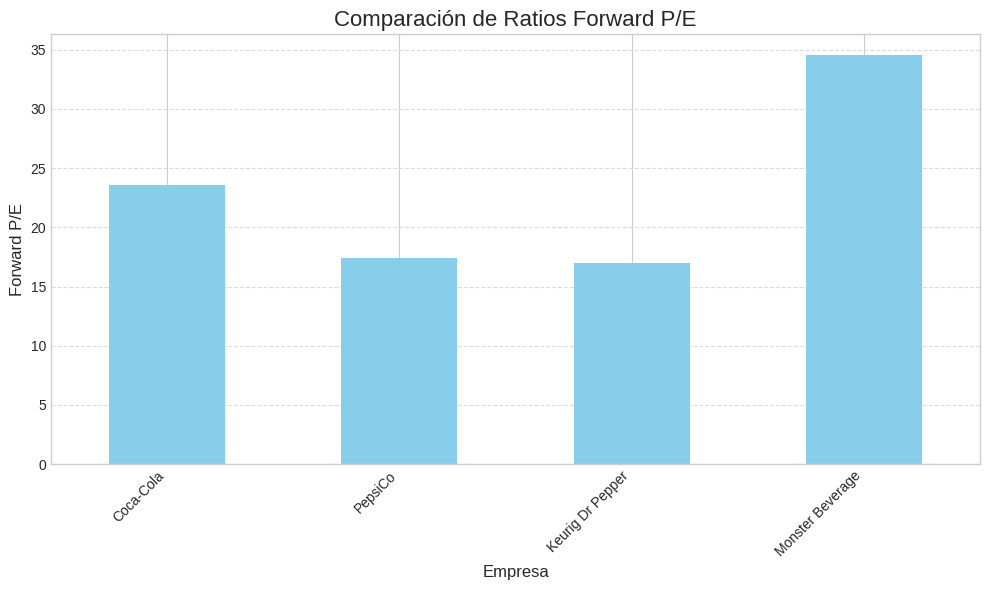

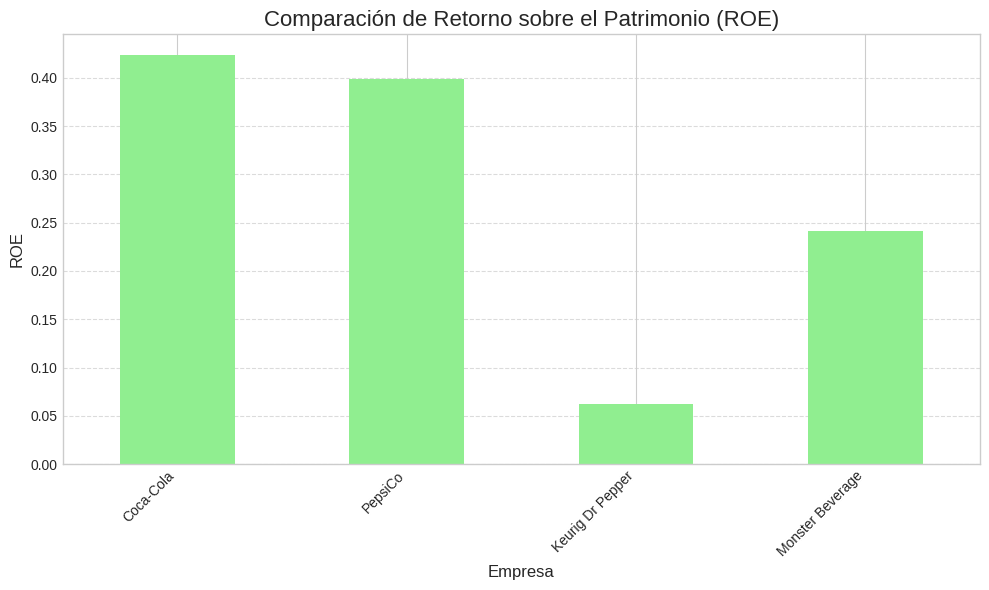

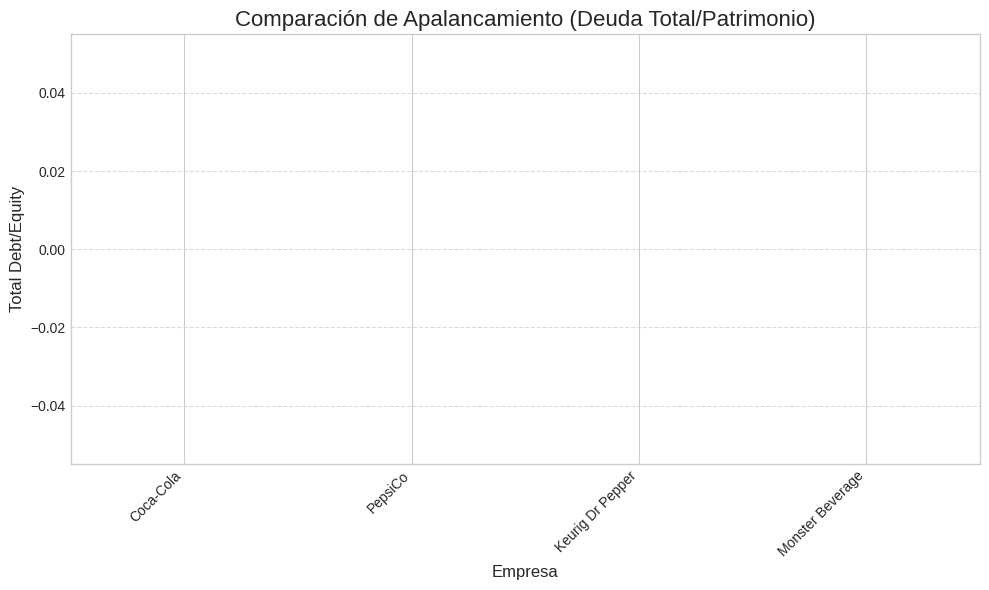


Análisis Visual:
Los gráficos de barras ofrecen una comparación visual rápida de los ratios clave.
- Un menor P/E o ROE más alto podría indicar una mejor oportunidad de inversión en este backtesting.
- Un menor ratio de Deuda/Patrimonio indica menor riesgo de apalancamiento.
Recuerda que estos son solo algunos de los muchos factores a considerar al evaluar una empresa.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ────────────────────────────────────────────────────────────────
# 1. Configuración del Sector
# ────────────────────────────────────────────────────────────────

SECTOR_COMPANIES = {
    'Coca-Cola': 'KO',
    'PepsiCo': 'PEP',
    'Keurig Dr Pepper': 'KDP',
    'Monster Beverage': 'MNST'
}

# ────────────────────────────────────────────────────────────────
# 2. Extracción de Ratios Financieros
# ────────────────────────────────────────────────────────────────

def get_company_data(ticker_symbol):
    """
    Descarga y extrae los principales ratios financieros y de mercado de una empresa.
    """
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    if not info:
        return None

    try:
        ev_ebitda = info.get('enterpriseValue') / info.get('ebitda')
    except (TypeError, ZeroDivisionError):
        ev_ebitda = np.nan

    try:
        ev_revenue = info.get('enterpriseValue') / info.get('totalRevenue')
    except (TypeError, ZeroDivisionError):
        ev_revenue = np.nan

    try:
        total_debt_equity = info.get('totalDebt') / info.get('totalEquity')
    except (TypeError, ZeroDivisionError):
        total_debt_equity = np.nan

    try:
        interest_coverage = info.get('ebit') / info.get('interestExpense')
    except (TypeError, ZeroDivisionError):
        interest_coverage = np.nan

    ratios = {
        'EV/EBITDA': ev_ebitda,
        'EV/Revenue': ev_revenue,
        'Forward P/E': info.get('forwardPE'),
        'Trailing P/E': info.get('trailingPE'),
        'PEG Ratio': info.get('pegRatio'),
        'Price/Book': info.get('priceToBook'),
        'Price/Sales': info.get('priceToSales'),
        'Operating Margin': info.get('operatingMargins'),
        'Profit Margin': info.get('profitMargins'),
        'ROA': info.get('returnOnAssets'),
        'ROE': info.get('returnOnEquity'),
        'Total Debt/Equity': total_debt_equity,
        'Interest Coverage': interest_coverage,
        'Market Cap': info.get('marketCap'),
        '52 Week High': info.get('fiftyTwoWeekHigh'),
        '52 Week Low': info.get('fiftyTwoWeekLow'),
        '52-Week Change': info.get('52WeekChange'),
        'Beta': info.get('beta')
    }

    return ratios

# ────────────────────────────────────────────────────────────────
# 3. Construcción del Dashboard y Gráficos
# ────────────────────────────────────────────────────────────────

print("--- Creando Dashboard Comparativo del Sector ---")

sector_data = []

for company, ticker in SECTOR_COMPANIES.items():
    print(f"Obteniendo datos para {company} ({ticker})...")
    company_ratios = get_company_data(ticker)
    if company_ratios:
        company_ratios['Empresa'] = company
        sector_data.append(company_ratios)

dashboard_df = pd.DataFrame(sector_data)
dashboard_df = dashboard_df.set_index('Empresa')

# Imprimir la tabla comparativa
print("\n" + "="*80)
print("Dashboard Sectorial de Compañías de Bebidas")
print("="*80)
print(dashboard_df.to_string(float_format="{:,.2f}".format))

# ────────────────────────────────────────────────────────────────
# 4. Generación de Gráficos de Comparación
# ────────────────────────────────────────────────────────────────

plt.style.use('seaborn-v0_8-whitegrid')

# Gráfico de Ratios de Valuación (Forward P/E)
plt.figure(figsize=(10, 6))
dashboard_df['Forward P/E'].plot(kind='bar', color='skyblue')
plt.title('Comparación de Ratios Forward P/E', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Forward P/E', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de Ratios de Rentabilidad (ROE)
plt.figure(figsize=(10, 6))
dashboard_df['ROE'].plot(kind='bar', color='lightgreen')
plt.title('Comparación de Retorno sobre el Patrimonio (ROE)', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('ROE', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de Ratios de Solvencia (Total Debt/Equity)
plt.figure(figsize=(10, 6))
dashboard_df['Total Debt/Equity'].plot(kind='bar', color='coral')
plt.title('Comparación de Apalancamiento (Deuda Total/Patrimonio)', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Total Debt/Equity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Análisis Visual:")
print("Los gráficos de barras ofrecen una comparación visual rápida de los ratios clave.")
print("- Un menor P/E o ROE más alto podría indicar una mejor oportunidad de inversión en este backtesting.")
print("- Un menor ratio de Deuda/Patrimonio indica menor riesgo de apalancamiento.")
print("Recuerda que estos son solo algunos de los muchos factores a considerar al evaluar una empresa.")